In [1]:
push!(LOAD_PATH, "../");

In [2]:
using Tempotrons
using Tempotrons.Utils
using Tempotrons.Plots
using Plots
pyplot(size = (500, 1000));

  0.969227 seconds (12.04 M allocations: 250.714 MiB, 7.62% gc time)


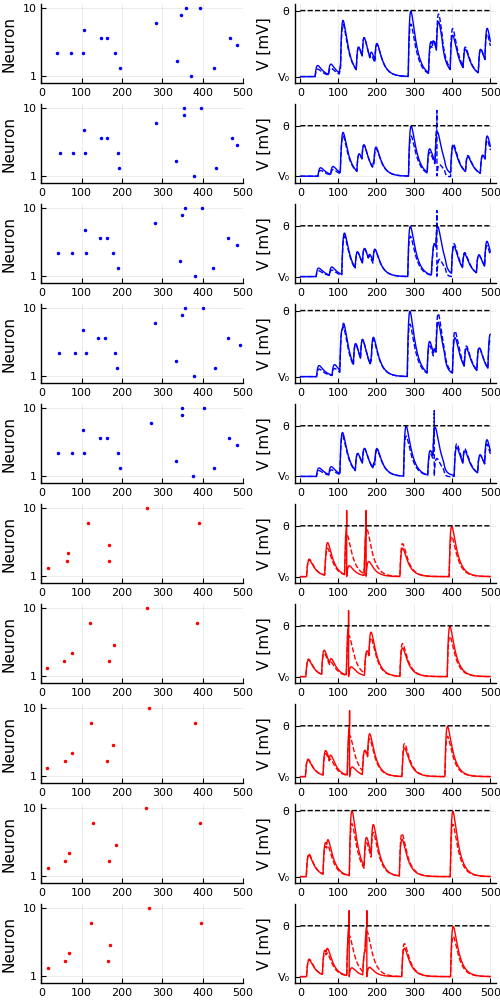

In [3]:
N = 10
T = 500
dt = 0.1
t = collect(0:dt:T)
ν = 3
n_samples = 10
n_steps = 5000
tmp = Tempotron(N = N)

base_samples = [[PoissonSpikeTrain(ν = ν, T = T)
                 for i = 1:N]
                for j = 1:2]
samples = [([SpikeJitter(s, T = T, σ = 5)
             for s ∈ base_samples[2(j-1)÷n_samples + 1]],
            Bool(2(j-1)÷n_samples))
           for j = 1:n_samples]
inp_plots = [PlotInputs(s[1], T_max = T, color = (s[2] ? :red : :blue))
             for s ∈ samples]

out_b = [tmp(s[1], t = t) for s ∈ samples]

@time for i = 1:n_steps
    s = rand(samples)
    Train!(tmp, s[1], s[2], T_max = T)
end

out_a = [tmp(s[1], t = t) for s ∈ samples]

train_plots = [PlotPotential(tmp, out_b = out_b[i], out_a = out_a[i],
                             t = t, color = (samples[i][2] ? :red : :blue))
                for i = 1:length(samples)]
ps = vcat(reshape(inp_plots, 1, :), reshape(train_plots, 1, :))
plot(ps[:]..., layout = (length(inp_plots), 2))
